# Tree models lab

In [1]:
from sklearn import tree
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import numpy as np
import graphviz
from sklearn.datasets import load_iris
import sys

In [2]:
#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=20)

In [3]:
iris = load_iris()

## 1) Get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions

In [4]:
INFLATION = 10
# label = 0 = setosa
# label = 1 = versicolor
# label = 2 = virginica

###### Inflate del dataset (setosa = 50, versicolor = 500, virginica = 500)

In [5]:
#Per ogni esempio setosa vogliamo aggiungere 10 esempi virginica e versicolor
def inflate_class(label):
    size = len(iris.data) // 3 # flooring division: 150 // 3
    indices = np.arange(size*label, size*(label + 1)) # indici del dataset che contengono gli elementi della classe "label"
    return np.repeat(indices, INFLATION)

iris_setosa_indices = np.arange(0, 50) # 50
iris_versicolor_indices_inflated = inflate_class(label=1) # 50*10
iris_virginica_indices_inflated = inflate_class(label=2) # 50*10

iris_indices_inflated = np.concatenate([
    iris_setosa_indices,
    iris_versicolor_indices_inflated,
    iris_virginica_indices_inflated]) # len = 1050

###### Randomizziamo gli indici e li suddividiamo tra training set (70%) e test set (circa 30%)

In [6]:
np.random.shuffle(iris_indices_inflated)

indices_training=iris_indices_inflated[:-300]
indices_test=iris_indices_inflated[-300:]

iris_X_train = iris.data[indices_training]
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test]
iris_y_test  = iris.target[indices_test]

In [7]:
x = np.arange(10); print(x); print(x[:-3]); print(x[-3:]) # prova

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6]
[7 8 9]


##### Dichiarazione del classificatore

In [8]:
clf = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=300,
    min_samples_leaf=5,
    class_weight={0:1,1:1,2:1}
)

##### Fit del modello

In [9]:
clf = clf.fit(iris_X_train, iris_y_train)

### Test del modello

In [10]:
predicted_y_test = clf.predict(iris_X_test)

In [11]:
no_error = True
for i in range(len(iris_y_test)): 
    # print("Instance # "+str(indices_test[i])+": ")
    color = "\x1b[31m" if (predicted_y_test[i] != iris_y_test[i]) else "\x1b[92m"
    if predicted_y_test[i] != iris_y_test[i]:
        no_error = False
        print(color + "Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\x1b[0m\n")

if no_error: print("Nessun errore")

Nessun errore


##### Accuracy & F1 score

In [12]:
# Print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1)) #f-score

Accuracy score: 1.0
F1 score: 1.0


##### Cross validation

In [13]:
from sklearn.model_selection import cross_val_score

iterations = 10
scores = cross_val_score(clf, iris.data, iris.target, cv=iterations) # score=accuracy
print([round(i,3) for i in scores])

[1.0, 0.933, 1.0, 1.0, 0.933, 0.867, 0.867, 1.0, 1.0, 1.0]


In [14]:
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=iterations, scoring='f1_macro')
print([round(i,3) for i in f1_scores])

[1.0, 0.933, 1.0, 1.0, 0.933, 0.867, 0.861, 1.0, 1.0, 1.0]


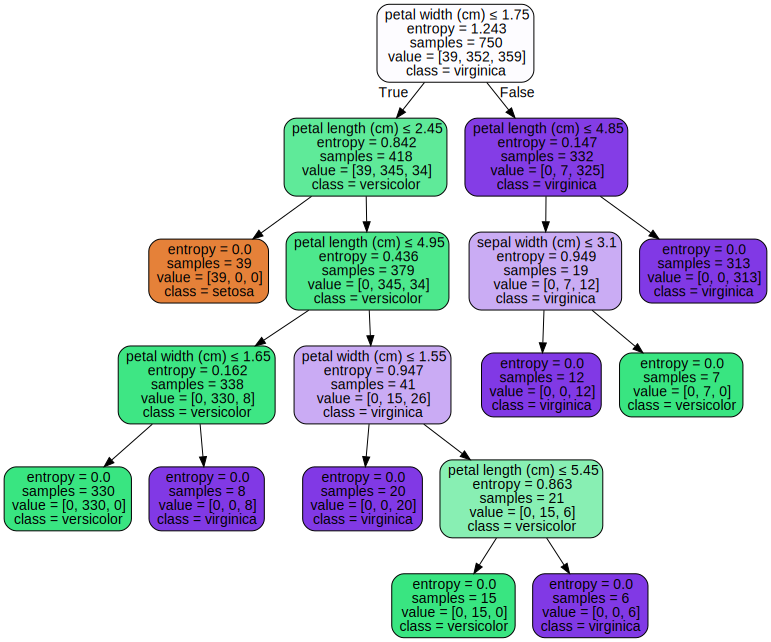

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

- Come vediamo la classe setosa è molto semplice da distinguere (basta una singola foglia sulla sinistra) Le altre due classi sono invece più simili e complesse da separare
- Questo albero è sicuramente overfittato (ad esempio le foglie generalmente includo davvero pochi esempi)

## 2) Modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor and vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.

##### Dichiarazione del classificatore

In [16]:
clf = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=300,
    min_samples_leaf=5,
    class_weight={0:1,1:10,2:10}
)

In [17]:
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

##### Fit del modello

In [18]:
clf = clf.fit(iris_X_train, iris_y_train)

### Test del modello

In [19]:
predicted_y_test = clf.predict(iris_X_test)

In [20]:
no_error = True
for i in range(len(iris_y_test)): 
    color = "\x1b[31m" if (predicted_y_test[i] != iris_y_test[i]) else "\x1b[92m"
    if predicted_y_test[i] != iris_y_test[i]:
        no_error = False
        print("Instance # "+str(indices_test[i])+": ")
        print(color + "Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\x1b[0m\n")

if no_error: print("Nessun errore")

Instance # 70: 
Predicted: virginica	 True: versicolor



##### Accuracy & F1 score

In [21]:
# Print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1)) #f-score

Accuracy score: 0.9
F1 score: 0.8857142857142858


##### Cross validation

In [22]:
from sklearn.model_selection import cross_val_score

iterations = 10
scores = cross_val_score(clf, iris.data, iris.target, cv=iterations) # score=accuracy
print([round(i,3) for i in scores])

[1.0, 0.933, 1.0, 1.0, 0.933, 0.867, 0.867, 1.0, 1.0, 1.0]


In [23]:
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=iterations, scoring='f1_macro')
print([round(i,3) for i in f1_scores])

[1.0, 0.933, 1.0, 1.0, 0.933, 0.867, 0.861, 1.0, 1.0, 1.0]


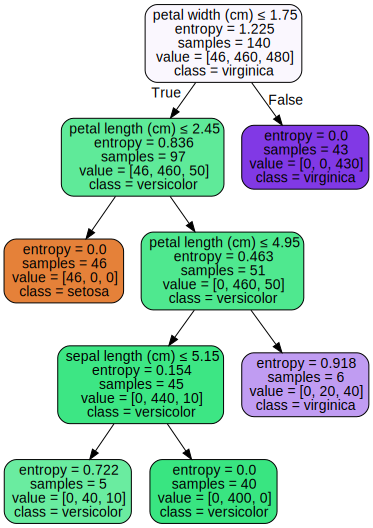

In [24]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

- Il risultato appare già migliore rispetto al primo step

## 3) learn trees but avoid overfitting (by improving the error on the test set) tuning the parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.

##### Dichiarazione del classificatore

In [25]:
clf_leaf = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=300,
    min_samples_leaf=30,
    class_weight={0:1,1:10,2:10}
)

In [26]:
clf_impurity = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=300,
    min_impurity_decrease=0.2,
    class_weight={0:1,1:10,2:10}
)

In [27]:
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

##### Fit del modello

In [28]:
clf_leaf = clf_leaf.fit(iris_X_train, iris_y_train)

In [29]:
clf_impurity = clf_impurity.fit(iris_X_train, iris_y_train)

### Test del modello

In [30]:
predicted_y_test_leaf = clf_leaf.predict(iris_X_test)

In [31]:
predicted_y_test_impurity = clf_impurity.predict(iris_X_test)

In [32]:
no_error = True
for i in range(len(iris_y_test)): 
    color = "\x1b[31m" if (predicted_y_test_leaf[i] != iris_y_test[i]) else "\x1b[92m"
    if predicted_y_test_leaf[i] != iris_y_test[i]:
        no_error = False
        print("Instance # "+str(indices_test[i])+": ")
        print(color + "Predicted: "+iris.target_names[predicted_y_test_leaf[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\x1b[0m\n")

if no_error: print("Nessun errore")

Instance # 70: 
Predicted: virginica	 True: versicolor



In [33]:
no_error = True
for i in range(len(iris_y_test)): 
    color = "\x1b[31m" if (predicted_y_test_impurity[i] != iris_y_test[i]) else "\x1b[92m"
    if predicted_y_test_impurity[i] != iris_y_test[i]:
        no_error = False
        print("Instance # "+str(indices_test[i])+": ")
        print(color + "Predicted: "+iris.target_names[predicted_y_test_impurity[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\x1b[0m\n")

if no_error: print("Nessun errore")

Instance # 70: 
Predicted: virginica	 True: versicolor



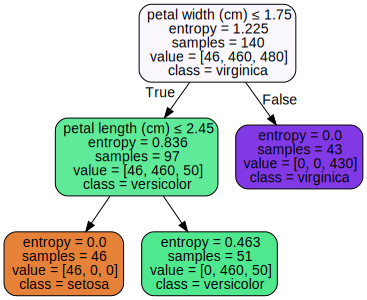

In [34]:
dot_data = tree.export_graphviz(clf_leaf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

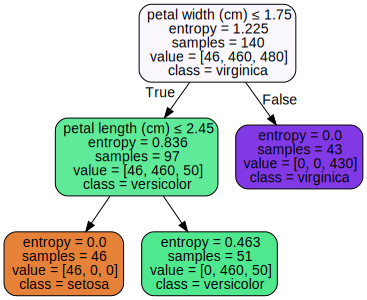

In [35]:
dot_data = tree.export_graphviz(clf_impurity, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

- Chiaramente questi due alberi sono in grado di generalizzare meglio

##### Cross validation

In [36]:
iterations = 10
scores = cross_val_score(clf_leaf, iris.data, iris.target, cv=iterations) # score=accuracy
print([round(i,3) for i in scores])
scores = cross_val_score(clf_impurity, iris.data, iris.target, cv=iterations) # score=accuracy
print([round(i,3) for i in scores])

[0.933, 0.933, 1.0, 0.933, 0.933, 0.867, 0.867, 1.0, 1.0, 1.0]
[0.933, 0.933, 1.0, 0.933, 0.933, 0.867, 0.867, 1.0, 1.0, 1.0]


In [37]:
f1_scores = cross_val_score(clf_leaf, iris.data, iris.target, cv=iterations, scoring='f1_macro')
print([round(i,3) for i in f1_scores])
f1_scores = cross_val_score(clf_impurity, iris.data, iris.target, cv=iterations, scoring='f1_macro')
print([round(i,3) for i in f1_scores])

[0.933, 0.933, 1.0, 0.933, 0.933, 0.867, 0.861, 1.0, 1.0, 1.0]
[0.933, 0.933, 1.0, 0.933, 0.933, 0.867, 0.861, 1.0, 1.0, 1.0]


## 4) Build the confusion matrix of the created tree models on the test set and show them. 

In [38]:
def generate_confusion_matrix(true_value, predicted_value):
    true_value = true_value.astype(int)
    predicted_value = predicted_value.astype(int)

    number_of_classes = len(np.unique(true_value)) # identifica il numero di classi diverse
    confusion_matrix = np.zeros((number_of_classes, number_of_classes)) # inizializza la confusion matrix

    for i in range(len(true_value)):
        confusion_matrix[true_value[i], predicted_value[i]] += 1 # aggiorna la cella corretta

    return confusion_matrix

In [39]:
print(iris_y_test)
print(predicted_y_test)
generate_confusion_matrix(iris_y_test, predicted_y_test)

[1 1 1 0 0 0 2 1 2 0]
[1 2 1 0 0 0 2 1 2 0]


array([[4., 0., 0.],
       [0., 3., 1.],
       [0., 0., 2.]])

## 5) build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

In [56]:
from sklearn.metrics import roc_curve, auc

# Fatto con l'aiuto del wiki di sklearn
def roc_plot(classes, pred, actual, title):
    fpr = dict()
    tpr = dict()
    roc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(actual[:, i], pred[:, i])
        roc[i] = auc(fpr[i], tpr[i]) # area sotto la curva

    colors = ['magenta', 'darkorange', 'cornflowerblue']
    for i, color in zip(range(len(classes)), colors):
        plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc[i]), marker='.')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [45]:
prob = clf_leaf.predict_proba(iris_X_test)
print(prob[0])

[0.         0.90196078 0.09803922]


`prob[0]` è una distribuzione di probabilità ed indica che, per l'albero clf_leaf:

- la probabilità che appartenga alla prima classe è 0
- la probabilità che appartenga alla seconda classe 0.9019
- la probabilità che appartenga alla terza classe è 0.098

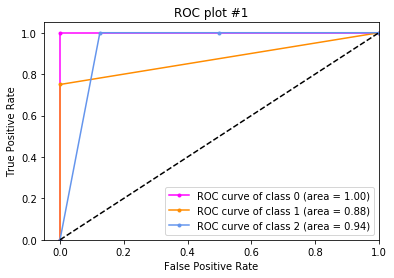

In [59]:
actual_prob = np.zeros((iris_y_test.size, 3))
for i,y in enumerate(iris_y_test):
    actual_prob[i,y] = 1 #es. [0,0,1]

roc_plot(clf_leaf.classes_, prob, actual_prob, "ROC plot #1")

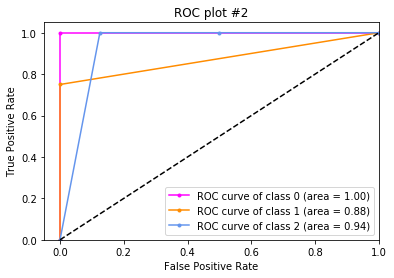

In [60]:
prob_i = clf_impurity.predict_proba(iris_X_test)
actual_prob_i = np.zeros((iris_y_test.size, 3))
for i,y in enumerate(iris_y_test):
    actual_prob_i[i,y] = 1

roc_plot(clf_impurity.classes_, prob_i, actual_prob_i, "ROC plot #2")